<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/Saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import of the libraries
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [2]:
#upload both datasets
skills_df=  pd.read_csv('Example_Technical_Skills.csv')
data=  pd.read_csv('Raw_Skills_Dataset.csv')
skills_df.head(5)

,Technology Skills
0,SAP Fiori Developer
1,Oracle Instance Management & Strategy
2,Boomi Master Data Management
3,Digital Manufacturing on Cloud ( DMC)
4,DevOps


In [3]:
#Check if there are dublicated in the dataset
print(data["RAW DATA"].is_unique)
print(data.shape)

False
(34116, 1)


In [4]:
#dropping the dublicates (almost half was removed)
data = data.drop_duplicates()
data = data[data["RAW DATA"] != "-"]
print(data.shape)

(15676, 1)


In [5]:
#Checks if there are any missing values in the dataset
data.isnull().sum()
#No empty rows with missing data

RAW DATA    0
dtype: int64

In [6]:
#Separate the Technological skills
skills_data = []
skills= list(skills_df["Technology Skills"])
 

In [7]:
#tokenize the skills. Remove the numbers punctuation
for i in skills:
  clean = re.sub(r"[^A-Za-z0-9\s]+", "", i)
  for j in word_tokenize(str(clean)):
    
    if len(j) >=2:
      skills_data.append(j.lower())    


In [8]:
#remove dublicates
skills_data = list(set(skills_data))
nltk.download("stopwords")

stopwords_ = set(stopwords.words("english"))
#Added some stopwords mannualy based on the given Raw and skills dataset differences
manual = ['our', 'i.e', 'assurance','skills', 'experience','development']
#remove stopwords from tokens so that only the most important words count
clean_tokens = [t for t in skills_data if not t in stopwords_ and manual]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Compare Raw data with tokens. If Raw data match with the tokens, leave it in the data set, otherwise remove
res = []
for i in data["RAW DATA"]:
  for keyword in clean_tokens:
    for word in i.split():
      if(keyword== word  and word not in manual):
            res.append(i)


In [10]:

res = list(set(res))


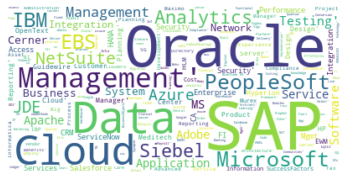

In [11]:
#Generate word clouds to identify the most common words in the sets
text = " ".join(str(cat) for cat in skills_df.values)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

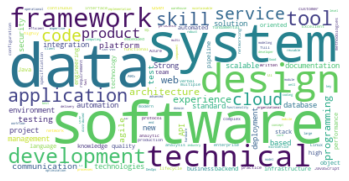

In [12]:
text = " ".join(str(cat) for cat in res)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# transform dataframe
result_df = pd.DataFrame({'Skill': res})
print(result_df.tail(5))

                                                  Skill
5940                          various network protocols
5941  standardized SDTM migration programming proced...
5942                    both REST and SOAP API services
5943                            the Salesforce platform
5944                 turret and mission system projects


In [14]:
#Write a dataframe with cleaned Technical skills to the csv file
result_df.to_csv("/content/Result.csv")